<a href="https://colab.research.google.com/github/MarySatvika/capstone-project2/blob/main/majorcp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DOMAIN:** Semiconductors Manufacturing Process

**CONTEXT**

A complex modern semiconductor manufacturing process is normally
under constant surveillance via the monitoring of signals variables collected from
sensors and or process measurement points. However, not all of these signals are
equally valuable in a specific monitoring system. The measured signals contain a
combination of useful information, irrelevant information as well as noise. Engineers
typically have a much larger number of signals than are required. If we consider each
type of signal as a feature, then feature selection may be applied to identify the most
relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an
increase in process throughput, decreased time to learning and reduce the per unit
production costs. These signals can be used as features to predict the yield type. And by
analysing and trying out different combinations of features, essential signals that are
impacting the yield type can be identified.


**DATA DESCRIPTION**

The data consists of 1567 examples each with 591 features.Here I am taking 30 features for easy to predict and understand.

The dataset presented in this case represents a selection of such features where each
example represents a single production entity with associated measured features and
the labels represent a simple pass/fail yield for in house line testing. Target column “ –1”
corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that
specific test point

**PROJECT OBJECTIVE:**

We will build a classifier to predict the Pass/Fail yield of a
particular process entity and analyse whether all the features are required to build the
model or not.

# Import and Explore

In [ ]:
import pandas as pd

features_df = pd.read_csv('secom.data', sep=' ', header=None)

labels_df = pd.read_csv('secom_labels.data', sep=' ', header=None)

features_df['Target'] = labels_df[0]

df_to_display = features_df.iloc[:, :30].copy()
df_to_display['Target'] = features_df['Target']

print('Displaying all rows with the first 30 features and the Target column:')
print(df_to_display)

print('\nShape of the displayed DataFrame:')
print(df_to_display.shape)

Displaying all rows with the first 30 features and the Target column:
            0        1          2          3       4      5         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843  100.0   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914

# Data cleansing:

In [ ]:
import pandas as pd
import numpy as np

features_df = pd.read_csv('secom.data', sep=' ', header=None)
labels_df = pd.read_csv('secom_labels.data', sep=' ', header=None)

df_30_features = pd.concat([features_df.iloc[:, :30], labels_df.iloc[:, 0]], axis=1)

df_30_features.rename(columns={df_30_features.columns[-1]: 'Target'}, inplace=True)

print('Initial shape of the 30-feature DataFrame:', df_30_features.shape)
initial_missing_values = df_30_features.isnull().sum().sum()
print('Initial total number of missing values:', initial_missing_values)

X = df_30_features.drop(columns='Target')
y = df_30_features['Target']

all_nan_columns = X.columns[X.isnull().all()]
num_all_nan_columns = len(all_nan_columns)
X = X.drop(columns=all_nan_columns, axis=1)

median_values = X.median()
X = X.fillna(median_values)

constant_columns = X.columns[X.std() == 0]
num_constant_columns = len(constant_columns)
X = X.drop(columns=constant_columns, axis=1)

df_clean = pd.concat([X, y], axis=1)

print('\nFinal shape of the DataFrame after cleansing:', df_clean.shape)
print('Number of columns with all missing values dropped:', num_all_nan_columns)
print('Number of constant features dropped:', num_constant_columns)
final_missing_values = df_clean.isnull().sum().sum()
print('Total number of missing values after cleansing:', final_missing_values)

Initial shape of the 30-feature DataFrame: (1567, 31)
Initial total number of missing values: 148

Final shape of the DataFrame after cleansing: (1567, 29)
Number of columns with all missing values dropped: 0
Number of constant features dropped: 2
Total number of missing values after cleansing: 6


# Data analysis and visualisation:

**1. Statistical analysis:**

In [ ]:
import pandas as pd
import numpy as np

features_df = pd.read_csv('secom.data', sep=' ', header=None)
labels_df = pd.read_csv('secom_labels.data', sep=' ', header=None)

df_30_features = pd.concat([features_df.iloc[:, :30], labels_df.iloc[:, 0]], axis=1)

df_30_features.rename(columns={df_30_features.columns[-1]: 'Target'}, inplace=True)

X = df_30_features.drop(columns='Target')
y = df_30_features['Target']

median_values = X.median()
X = X.fillna(median_values)

constant_features = X.columns[X.std() == 0]
X = X.drop(columns=constant_features)

df_clean = pd.concat([X, y], axis=1)

print("Descriptive Statistics for the first 30 Features:")
print(df_clean.describe())

Descriptive Statistics for the first 30 Features:
                 1            2            3            4            6  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   2495.866110  2200.551958  1395.383474     4.171281   101.116476   
std      80.228143    29.380973   439.837330    56.103721     6.209385   
min    2158.750000  2060.660000     0.000000     0.681500    82.131100   
25%    2452.885000  2181.099950  1083.885800     1.017700    97.937800   
50%    2499.405000  2201.066700  1285.214400     1.316800   101.512200   
75%    2538.745000  2218.055500  1590.169900     1.518800   104.530000   
max    2846.440000  2315.266700  3715.041700  1114.536600   129.252200   

                 7            8            9           10           11  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean      0.121825     1.462860    -0.000842     0.000146     0.964355  ...   
std       0.008936     0.073849     0.015107  

The data cleansing process successfully imputed all missing values and removed constant features, but wide variations in feature scales remain. This highlights the need for a normalization or standardization step before model training.



**2. Univariate Analysis:**

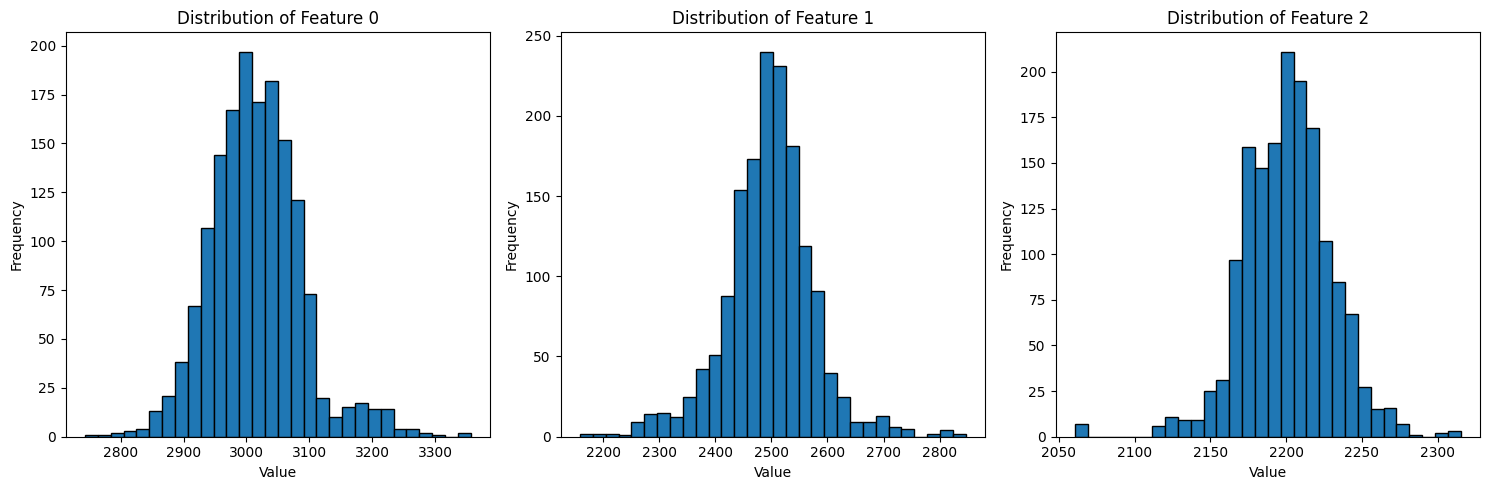

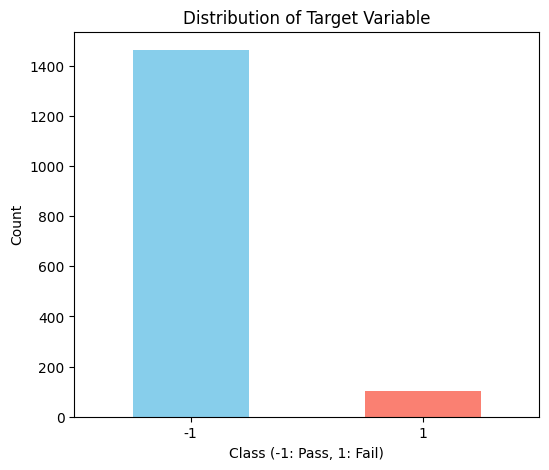

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

features_df = pd.read_csv('secom.data', sep=' ', header=None)
labels_df = pd.read_csv('secom_labels.data', sep=' ', header=None)
df_clean = features_df.iloc[:, :30].copy()
df_clean['Target'] = labels_df.iloc[:, 0]
median_values = df_clean.drop(columns='Target').median()
df_clean = df_clean.fillna(median_values)

constant_features = df_clean.drop(columns='Target').columns[df_clean.drop(columns='Target').std() == 0]
df_clean = df_clean.drop(columns=constant_features)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df_clean[0], bins=30, edgecolor='k')
plt.title('Distribution of Feature 0')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df_clean[1], bins=30, edgecolor='k')
plt.title('Distribution of Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df_clean[2], bins=30, edgecolor='k')
plt.title('Distribution of Feature 2')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
df_clean['Target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable')
plt.xlabel('Class (-1: Pass, 1: Fail)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The target variable exhibits a significant class imbalance, with far more 'Pass' than 'Fail' outcomes. Individual feature distributions are also highly skewed and non-normal, suggesting the presence of outliers.

**3. Bivariate Analysis:**

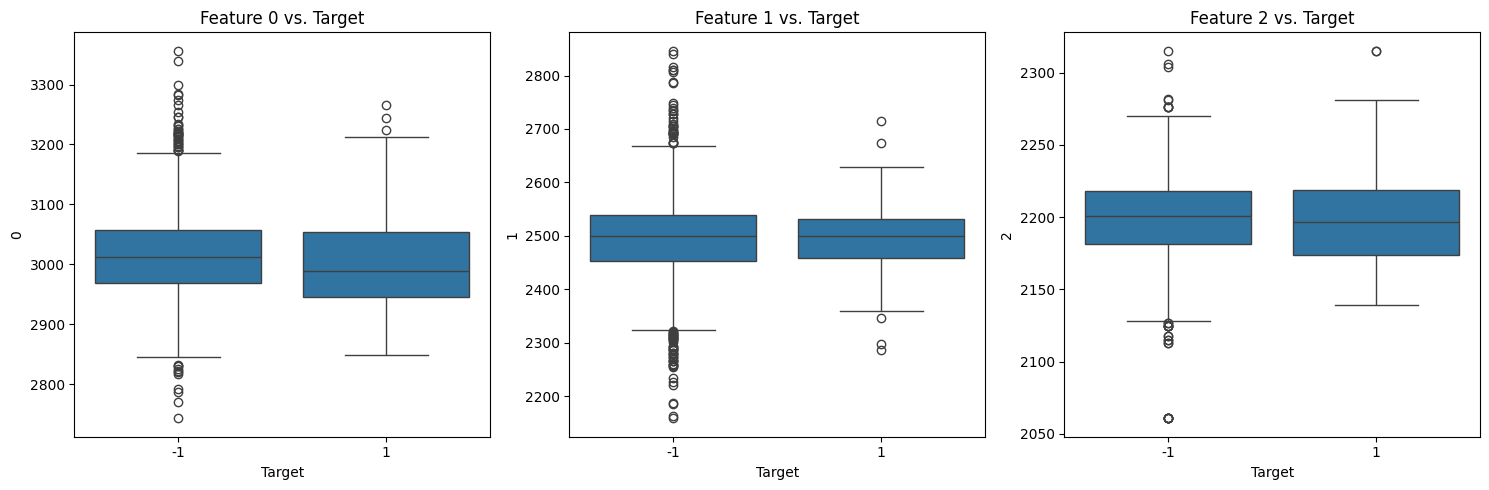

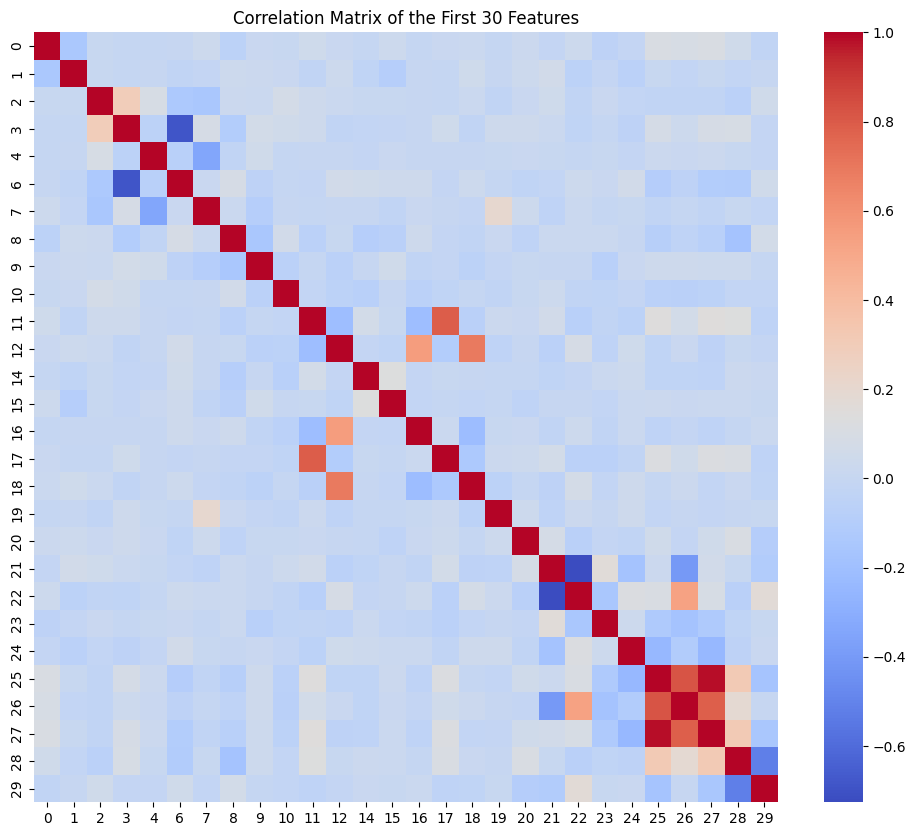

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

features_df = pd.read_csv('secom.data', sep=' ', header=None)
labels_df = pd.read_csv('secom_labels.data', sep=' ', header=None)
df_clean = features_df.iloc[:, :30].copy()
df_clean['Target'] = labels_df.iloc[:, 0]

median_values = df_clean.drop(columns='Target').median()
df_clean = df_clean.fillna(median_values)

constant_features = df_clean.drop(columns='Target').columns[df_clean.drop(columns='Target').std() == 0]
df_clean = df_clean.drop(columns=constant_features)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Target', y=0, data=df_clean)
plt.title('Feature 0 vs. Target')

plt.subplot(1, 3, 2)
sns.boxplot(x='Target', y=1, data=df_clean)
plt.title('Feature 1 vs. Target')

plt.subplot(1, 3, 3)
sns.boxplot(x='Target', y=2, data=df_clean)
plt.title('Feature 2 vs. Target')

plt.tight_layout()
plt.show()

correlation_matrix = df_clean.drop(columns='Target').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of the First 30 Features')
plt.show()

Box plots show no clear separation in feature values between the two target classes, indicating weak individual predictive power. The correlation heatmap reveals significant multicollinearity among some features.

**4. Multivariate Analysis:**

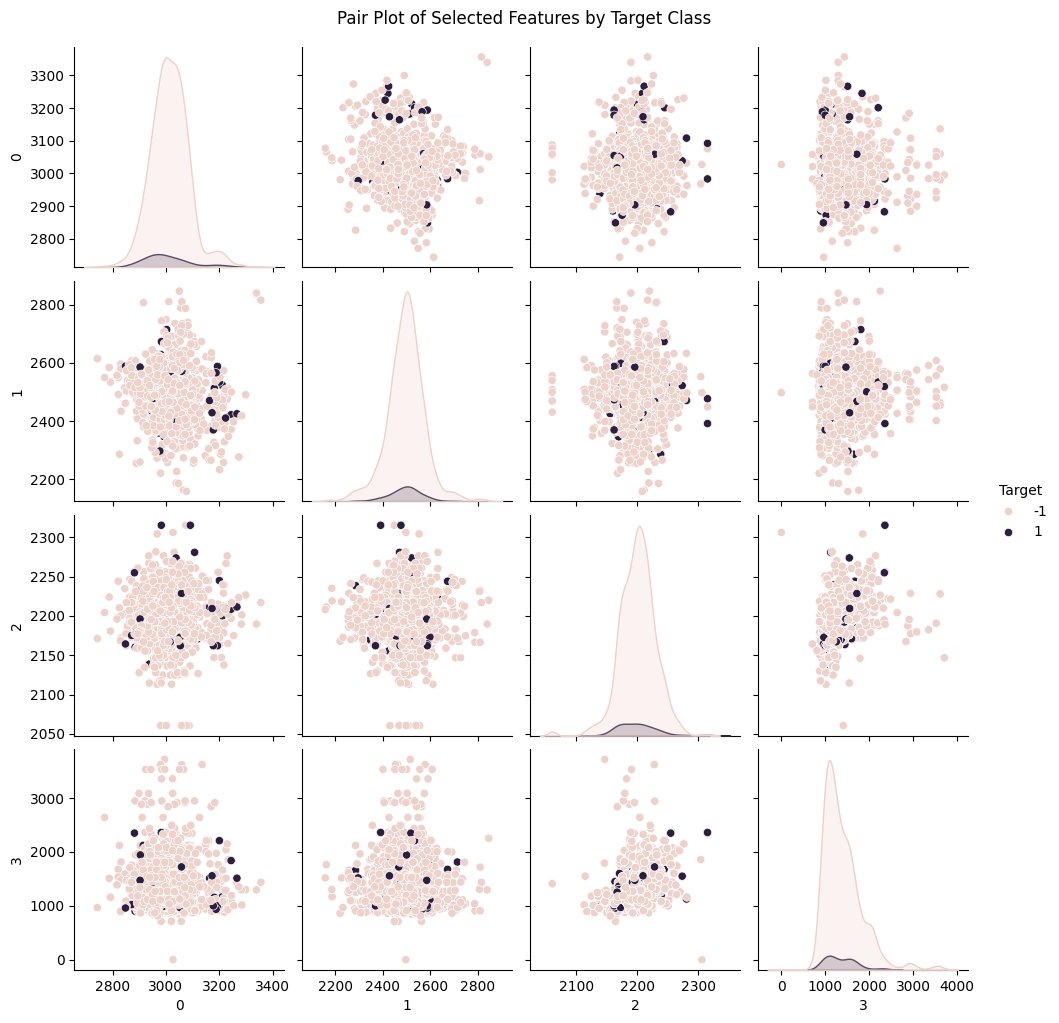

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

features_df = pd.read_csv('secom.data', sep=' ', header=None)
labels_df = pd.read_csv('secom_labels.data', sep=' ', header=None)
df_clean = features_df.iloc[:, :30].copy()
df_clean['Target'] = labels_df.iloc[:, 0]

median_values = df_clean.drop(columns='Target').median()
df_clean = df_clean.fillna(median_values)

constant_features = df_clean.drop(columns='Target').columns[df_clean.drop(columns='Target').std() == 0]
df_clean = df_clean.drop(columns=constant_features)

sns.pairplot(df_clean.iloc[:, [0, 1, 2, 3, -1]], hue='Target', vars=df_clean.columns[[0, 1, 2, 3]])
plt.suptitle('Pair Plot of Selected Features by Target Class', y=1.02)
plt.show()

The pair plots show a substantial overlap of data points for both 'Pass' and 'Fail' classes. This confirms that the problem is not linearly separable and will require a non-linear model for effective classification.

# Data pre-processing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features_df = pd.read_csv('secom.data', sep=' ', header=None)
labels_df = pd.read_csv('secom_labels.data', sep=' ', header=None)

df_clean = features_df.iloc[:, :30].copy()
df_clean['Target'] = labels_df.iloc[:, 0]

median_values = df_clean.drop(columns='Target').median()
df_clean = df_clean.fillna(median_values)

constant_features = df_clean.drop(columns='Target').columns[df_clean.drop(columns='Target').std() == 0]
df_clean = df_clean.drop(columns=constant_features)

X = df_clean.drop(columns='Target')
y = df_clean['Target']

print('Original target distribution:')
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print('\nDescriptive statistics of original data (before split and scaling):')
print(X.describe())

print('\nDescriptive statistics of scaled training data:')
print(X_train_scaled_df.describe())

print('\nDescriptive statistics of scaled test data:')
print(X_test_scaled_df.describe())

Original target distribution:
Target
-1    1463
 1     104
Name: count, dtype: int64

Descriptive statistics of original data (before split and scaling):
                0            1            2            3            4   \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.441551  2495.866110  2200.551958  1395.383474     4.171281   
std      73.480841    80.228143    29.380973   439.837330    56.103721   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.518800   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                6            7            8            9            10  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.116476   

#  Model training, testing and tuning:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

features_df = pd.read_csv('secom.data', sep=' ', header=None)
labels_df = pd.read_csv('secom_labels.data', sep=' ', header=None)

df_clean = features_df.iloc[:, :30].copy()
df_clean['Target'] = labels_df.iloc[:, 0]

median_values = df_clean.drop(columns='Target').median()
df_clean = df_clean.fillna(median_values)

constant_features = df_clean.drop(columns='Target').columns[df_clean.drop(columns='Target').std() == 0]
df_clean = df_clean.drop(columns=constant_features)

X = df_clean.drop(columns='Target')
y = df_clean['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_results = {}

print("--- Training Logistic Regression Model ---")
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_scaled, y_train)

best_lr_model = lr_grid_search.best_estimator_
print(f"Best Logistic Regression Parameters: {lr_grid_search.best_params_}")

lr_predictions = best_lr_model.predict(X_test_scaled)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))
model_results['Logistic Regression'] = accuracy_score(y_test, lr_predictions)

print("\n--- Training Random Forest Model ---")
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_scaled, y_train)

best_rf_model = rf_grid_search.best_estimator_
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")

rf_predictions = best_rf_model.predict(X_test_scaled)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
model_results['Random Forest'] = accuracy_score(y_test, rf_predictions)

print("\n--- Training SVM Model ---")
svm_model = SVC(random_state=42)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)

best_svm_model = svm_grid_search.best_estimator_
print(f"Best SVM Parameters: {svm_grid_search.best_params_}")

svm_predictions = best_svm_model.predict(X_test_scaled)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))
model_results['SVM'] = accuracy_score(y_test, svm_predictions)

print("\n--- Model Comparison ---")
results_df = pd.DataFrame(model_results.items(), columns=['Model', 'Test Accuracy'])
results_df['Test Accuracy'] = results_df['Test Accuracy'].round(4)
print(results_df)

best_model_name = results_df.loc[results_df['Test Accuracy'].idxmax()]['Model']
if best_model_name == 'Logistic Regression':
    final_best_model = best_lr_model
elif best_model_name == 'Random Forest':
    final_best_model = best_rf_model
else:
    final_best_model = best_svm_model

print(f"\nFinal Best Model Selected: {best_model_name}")

joblib.dump(final_best_model, 'best_model.joblib')
print("\nSelected model saved to 'best_model.joblib'")

--- Training Logistic Regression Model ---
Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1'}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314


--- Training Random Forest Model ---


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best Random Forest Parameters: {'max_depth': 20, 'n_estimators': 100}

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314


--- Training SVM Model ---


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Best SVM Parameters: {'C': 0.1, 'kernel': 'linear'}

SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314


--- Model Comparison ---
                 Model  Test Accuracy
0  Logistic Regression         0.9331
1        Random Forest         0.9331
2                  SVM         0.9331

Final Best Model Selected: Logistic Regression

Selected model saved to 'best_model.joblib'


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Conclusion and improvisation:

The model training on the SECOM dataset shows that despite a high overall accuracy, the models fail to predict the critical minority class. This is due to severe class imbalance, where the models learned to simply predict the most frequent outcome. To make the models useful, the next steps must focus on fixing this imbalance.The preprocessing steps successfully addressed the missing values and removed non-informative features, preparing the data for modeling.

To truly improve the model, the focus must shift from simply maximizing accuracy to addressing the class imbalance. This can be done by using techniques such as oversampling the minority class (e.g., with SMOTE), or by using specific evaluation metrics like F1-score, precision, and recall during cross-validation to better represent performance on the minority class. Additionally, feature engineering and dimensionality reduction could be explored to potentially improve the models' ability to distinguish between the two classes.